<a href="https://colab.research.google.com/github/boyercb/bst263-final-project/blob/master/BST_263_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC, l1_min_c
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

In [0]:
# currently the coding is 
# run cleaning code
# url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/mydata_unique.csv'
 url = 'https://raw.githubusercontent.com/boyercb/bst263-final-project/master/mydata_all.csv'

# Please use my url here since Chloe and I might keep updating and adding new dataset to here. 
# url= 'https://raw.githubusercontent.com/lcareflektor/bst263finalProject/master/mydata_all.csv'
mydata = pd.read_csv(url)

In [3]:
mydata.head(5)

,0,1,2,3,4,5,6,7,8,9,...,1290,1291,1292,1293,1294,1295,patient_id,age,gender,label
0,0.179077,0.031064,0.279580,0.080402,0.160804,0.023755,0.124258,0.060302,0.025582,0.184559,...,0.040201,0.233897,0.029237,0.087711,0.058474,0.009137,1,41,M,1
1,0.228415,0.023755,0.314299,0.042028,0.179077,0.054820,0.074920,0.014619,0.032892,0.193696,...,0.005482,0.215624,0.095021,0.193696,0.016446,0.056647,1,41,M,1
2,0.226587,0.005482,0.217451,0.005482,0.056647,0.009137,0.160804,0.038374,0.244861,0.095021,...,0.100503,0.206487,0.020101,0.096848,0.084057,0.001827,1,41,M,1
3,0.113294,0.040201,0.294198,0.031064,0.087711,0.093193,0.166286,0.080402,0.058474,0.166286,...,0.040201,0.098675,0.043856,0.155322,0.023755,0.000000,1,41,M,1
4,0.043856,0.047510,0.502513,0.087711,0.080402,0.054820,0.115121,0.018273,0.014619,0.003655,...,0.031064,0.137049,0.065783,0.080402,0.051165,0.009137,2,50,M,1


**Image pre-processing**

In [0]:
# create training and validation sets

# total column number
cols = mydata.shape[1]
col_image_end = cols-5
col_label = cols-1

train, test = train_test_split(mydata, test_size=0.20, random_state=42)

X_train, y_train = train.iloc[:, 0:col_image_end], train.iloc[:, col_label]
X_test, y_test = test.iloc[:, 0:col_image_end], test.iloc[:, col_label]


In [0]:
# preprocessing 
scaler = StandardScaler().fit(X_train)
X_std = scaler.fit_transform(X_train)
X_test_std = scaler.fit_transform(X_test)

# constants
n_folds = 10
seed = 3370

# tuning parameters
svm_rbf_params = {
    'C': np.logspace(-4, 1, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_poly_params = {
    'C': np.logspace(-4, 1.5, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_sig_params = {
    'C': np.logspace(-4, 1, 25), 
    'gamma': np.logspace(-4, 0, 5)
}

svm_lin_params = {'C': np.logspace(-4, 0, 25)}

logit_params = {
    'C': np.logspace(-4, 0.5, 25), 
    'intercept_scaling': [100000],
    }

rf_params = {
    'bootstrap': [True],
    'max_depth': [int(x) for x in np.linspace(1, 100, 11)],
    'max_features': ['sqrt'],
    'min_samples_leaf': [3, 4],
    'min_samples_split': [8, 9, 10],
    'n_estimators': [int(x) for x in np.linspace(50, 1000, 5)]
}

gb_params = {
    'learning_rate': np.linspace(0.01, 0.1, num = 11),
    'max_depth': [int(x) for x in np.linspace(1, 100, num = 11)],
    'subsample': [0.8, 0.85, 0.9, 0.95, 1],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [int(x) for x in np.linspace(10, 1000, 50)]
}

**Model 1: SVM**
1. Use "rbf" kernel

In [7]:
# model: SVM - rbf
svc_rbf = SVC(kernel = "rbf", random_state=0)
svm_rbf = GridSearchCV(
    svc_rbf, 
    svm_rbf_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )
svm_rbf.fit = svm_rbf.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.5s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   41.6s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  2.4min finished


2. Use "poly" kernel


In [8]:
# model: SVM - poly kernel
svc_poly = SVC(kernel = "poly", random_state=0)
svm_poly = GridSearchCV(
    svc_poly, 
    svm_poly_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
svm_poly.fit = svm_poly.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  2.3min finished


3. Use "sigmoid" kernel

In [9]:
# model: SVM - sigmoid kernel
svc_sig = SVC(kernel = "sigmoid", random_state=0)
svm_sig = GridSearchCV(
    svc_sig, 
    svm_sig_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)
svm_sig.fit = svm_sig.fit(X_std, y_train)

Fitting 10 folds for each of 125 candidates, totalling 1250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   16.4s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   40.1s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1250 out of 1250 | elapsed:  1.9min finished


4. Use "linear" kernel

In [10]:
# model: SVM - linear kernel
svc_lin = SVC(kernel = "linear", random_state=0)
svm_lin = GridSearchCV(
    svc_lin, 
    svm_lin_params, 
    cv=n_folds, 
    scoring='accuracy', 
    verbose=2,
    n_jobs=-1)
svm_lin.fit = svm_lin.fit(X_std, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   10.9s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:   21.4s finished


5. Compare prediction AUCs across different kernels 

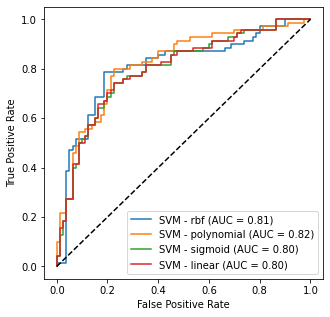

In [13]:
svm_models = [svm_rbf, svm_poly, svm_sig, svm_lin]
svm_names = ["SVM - rbf", "SVM - polynomial", "SVM - sigmoid", "SVM - linear"]

aucs_test = []
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(svm_models, svm_names): 
    roc_output = metrics.plot_roc_curve(mod[0], X_test_std, y_test, 
                                        ax=ax, name=mod[1])
    aucs_test.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

**Model 2: L1-logistic regression**

In [17]:
# model: L1-logistic regression
logit = LogisticRegression(penalty='l1', solver='liblinear', random_state=seed)
logistic = GridSearchCV(
    logit, 
    logit_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
    )

logistic.fit = logistic.fit(X_std, y_train)

Fitting 10 folds for each of 25 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done 227 out of 250 | elapsed:    5.9s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:    6.9s finished


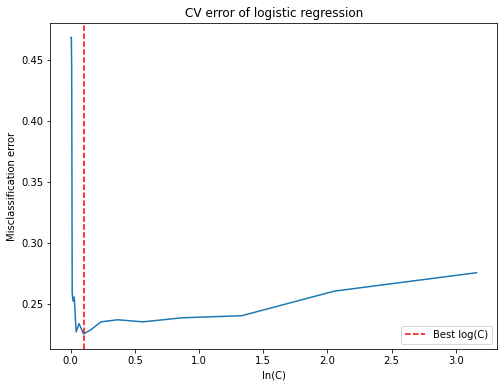

In [18]:
# plot CV errors
b = logistic.cv_results_['mean_test_score'].argmax()

plt.figure().set_size_inches(8, 6)
plt.plot(logit_params['C'],1 - logistic.cv_results_['mean_test_score'])
plt.axvline(logit_params['C'][b], linestyle='--', color='red', label='Best log(C)')
plt.ylabel('Misclassification error')
plt.xlabel('ln(C)')
plt.title('CV error of logistic regression')
plt.legend(loc='lower right')
plt.show()

**Model 3: Random forest**

In [0]:
# model: Random forest 
rf = RandomForestClassifier(random_state=seed)
rf = GridSearchCV(  
    estimator=rf, 
    param_grid=rf_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2,  
    n_jobs=-1
)
rf.fit = rf.fit(X_std, y_train)


Fitting 10 folds for each of 330 candidates, totalling 3300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   25.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  7.0min


**Model 4: LDA**

In [0]:
# model: LDA
LDA = LinearDiscriminantAnalysis()
LDA.fit=LDA.fit(X_std, y_train)

**Model 5: QDA**

In [0]:
# model: QDA
QDA = QuadraticDiscriminantAnalysis()
QDA.fit = QDA.fit(X_std, y_train)

**Model 6: XGBoost**

In [0]:
# model: XGBoost
gb = GradientBoostingClassifier(random_state=seed) 
gb = GridSearchCV(
    estimator=gb, 
    param_grid=gb_params, 
    cv=n_folds, 
    scoring='accuracy',
    verbose=2, 
    n_jobs=-1
)
gb.fit = gb.fit(X_std, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   37.2s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  8.8min finished


**Model 7: Naive Bayes**

In [60]:
# model: Naive Bayes
bayes = GaussianNB()
bayes.fit(X_std, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

**Model 8: Voting Ensemble Classifier**

In [72]:
# model: Ensemble
models = [("SVM - linear",svm_lin),
          ("Logistic",logistic),
          ("Random Forest",rf),
          ("LDA",LDA),
          ("QDA",QDA),
          ("XGBoost",gb),
          ("Naive Bayes",bayes)]

ensemble = VotingClassifier(estimators=models, voting='soft')
ensemble.fit(X_std, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   52.7s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 1000 out of 1000 | elapsed:  6.5min finished
/Users/christopherboyer/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:691: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   39.7s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  9.1min finished


VotingClassifier(estimators=[('SVM - linear',
                              GridSearchCV(cv=10, error_score=nan,
                                           estimator=SVC(C=1.0,
                                                         break_ties=False,
                                                         cache_size=200,
                                                         class_weight=None,
                                                         coef0=0.0,
                                                         decision_function_shape='ovr',
                                                         degree=3,
                                                         gamma='scale',
                                                         kernel='linear',
                                                         max_iter=-1,
                                                         probability=False,
                                                         random_state=0,
           

**Clustering/Data reduction**

Variance Explained,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60,0.55,0.50
Number of PCs Needed,199,165,136,110,88,69,52,38,26,17


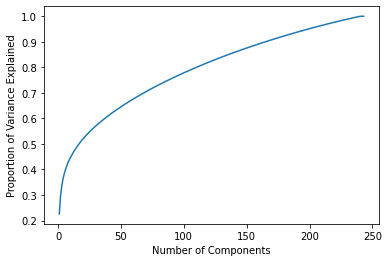

In [0]:
# Generate PCAR
from sklearn.decomposition import PCA
full_pca = PCA(random_state=0).fit(X_std)
full_pca.n_components_

cum_exp_var = np.cumsum(full_pca.explained_variance_ratio_)

plt.plot(np.arange(len(cum_exp_var))+1, cum_exp_var)
plt.xlabel('Number of Components')
plt.ylabel('Proportion of Variance Explained');

cutoffs = np.flip(np.arange(0.5, 1, 0.05))
cutoffs_df = pd.DataFrame([[min(np.arange(len(cum_exp_var))[cum_exp_var > c]) + 1 for c in cutoffs]], 
                          columns=cutoffs, index=['Number of PCs Needed'])
cutoffs_df.columns.name = 'Variance Explained'
cutoffs_df


In [0]:
# model: KMeans
final_pca = PCA(165, random_state=0).fit(X_train)
pixels_transform = final_pca.transform(X_train)

kmeans_kpp = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0).fit(pixels_transform)
kmeans_kpp_labels = kmeans_kpp.labels_

In [0]:
# model: EM
em_kmeans = GaussianMixture(n_components=2, init_params='kmeans', n_init=1, random_state=0).fit(pixels_transform)
em_kmeans_labels = em_kmeans.predict(pixels_transform)

**Model evaluation and comparison**

In [0]:
##all_models = [svm,logit,rf,LDA,QDA,gb,kmeans_kpp,em_kmeans]
##mod_names = ["SVM","Logistic","Random Forest","LDA", "QDA","XGBoost","KMeans","Gaussian Mixture"]
all_models = [svm_lin,logistic,rf,LDA,QDA,gb,bayes, ensemble]
mod_names = ["SVM - linear","Logistic","Random Forest","LDA", "QDA","XGBoost", "Naive Bayes", "Ensemble"]

In [0]:
Y_train_pred_svm_lin = svm_lin.fit.predict(X_train)
Y_train_pred_logistic = logistic.fit.predict(X_train)
Y_train_pred_rf = rf.fit.predict(X_train)
Y_train_pred_lda = LDA.fit.predict(X_train)
Y_train_pred_qda = QDA.fit.predict(X_train)
Y_train_pred_xgb = gb.fit.predict(X_train)
Y_train_pred_bayes = bayes.fit.predict(X_train)
#Y_train_pred_kmean = kmeans_kpp.labels_
#Y_train_pred_em = em_kmeans.predict(pixels_transform)

ValueError: ignored

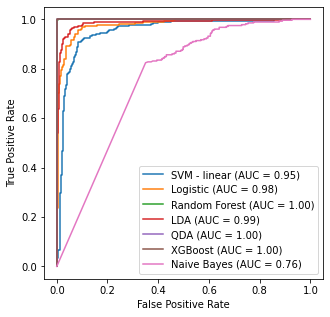

In [77]:

X_testaucs_train = []
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(all_models, mod_names): 
    roc_output = metrics.plot_roc_curve(mod[0], X_std, y_train, 
                                        ax=ax, name=mod[1])
    aucs_train.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

In [0]:
Y_test_pred_svm_lin = svm_lin.fit.predict(X_test)
Y_test_pred_logistic = logistic.fit.predict(X_test)
Y_test_pred_rf = rf.fit.predict(X_test)
Y_test_pred_lda = LDA.fit.predict(X_test)
Y_test_pred_qda = QDA.fit.predict(X_test)
Y_test_pred_xgb = gb.fit.predict(X_test)

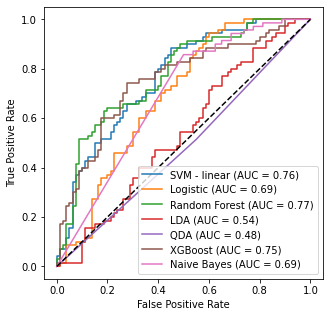

In [65]:
aucs_test = []
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
for mod in zip(all_models, mod_names): 
    roc_output = metrics.plot_roc_curve(mod[0], X_test_std, y_test, 
                                        ax=ax, name=mod[1])
    aucs_test.append(roc_output.roc_auc)

ax.plot([0, 1], [0, 1], 'k--')
plt.show()

In [66]:
pd.DataFrame(np.vstack([aucs_train, aucs_test]), 
             index=["Training AUC", "Test AUC"], 
             columns=mod_names)

,SVM - linear,Logistic,Random Forest,LDA,QDA,XGBoost,Naive Bayes
Training AUC,0.951607,0.979241,0.999989,0.98503,1.000000,1.000000,0.755950
Test AUC,0.764464,0.688750,0.773929,0.53875,0.482143,0.752679,0.685357


In [78]:
ensemble.predict_proba()

AttributeError: ignored

In [79]:
rf.fit.best_params_

{'n_estimators': 50,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 80,
 'bootstrap': True}